In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression

In [2]:
x, y = make_regression(n_samples=500,n_features=1,n_targets=1, noise=75, random_state=40)

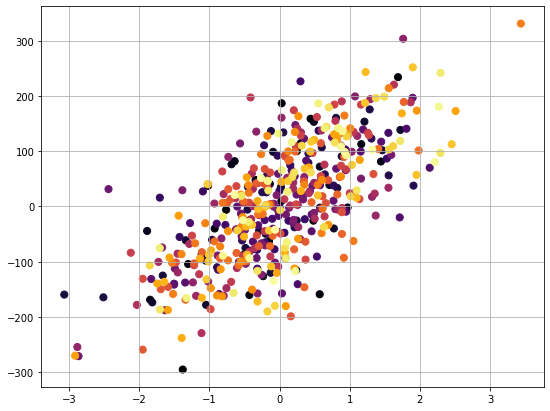

In [3]:
co = np.arange(len(x))

plt.figure(figsize=(9,7))
plt.scatter(x,y,c=co,cmap='inferno',s=50)
plt.grid()

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [6]:
print(f"Slope => {model.coef_}, Intercept => {model.intercept_}")

Slope => [77.13612666], Intercept => 4.335947263280729


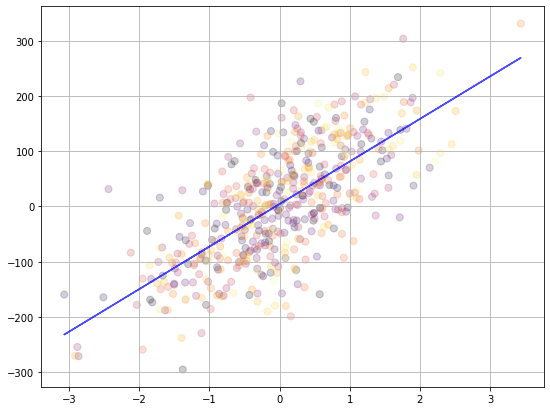

In [7]:
plt.figure(figsize=(9,7))
plt.scatter(x,y,c=co,cmap='inferno',s=50,alpha=0.2)
plt.plot(x, model.predict(x),c='blue',alpha=0.7)
plt.grid()

### Now that we know what the actual values should be lets write the GD

<IPython.core.display.Javascript object>


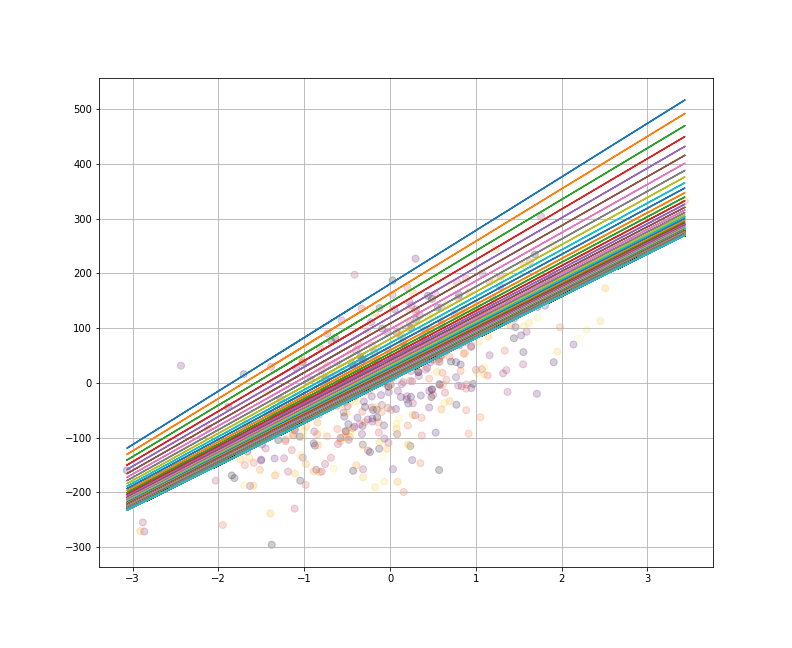

Slope => 77.13612665998596, Intercept => 4.335947263280731


In [53]:
# Choosing arbitary values for m and b
m = 100
b = 200

epochs = 500
lr = 0.0001

plt.figure(figsize=(11,9))
plt.scatter(x,y,c=co,cmap='inferno',s=50,alpha=0.2)
plt.grid()

for i in range(epochs):
    loss_slope_b = -2 * np.sum(y - m * x.ravel() - b)
    loss_slope_m = -2 * np.sum((y - m * x.ravel() - b)*x.ravel())

    b = b - (lr * loss_slope_b)
    m = m - (lr * loss_slope_m)
    
    y_pred = m * x + b
    
    plt.plot(x, y_pred)
#     print(m,b)

print(f"Slope => {m}, Intercept => {b}")

In [72]:
# Choosing arbitary values for m and b
m = 500
b = 500

epochs = 100
lr = 0.0001

all_b = []
all_m = []
all_cost = []


for i in range(epochs):
    slope_b = 0
    slope_m = 0
    cost = 0
    for j in range(x.shape[0]):
        slope_b = slope_b - 2*(y[j] - (m * x[j]) -  b)
        slope_m = slope_m - 2*(y[j] - (m * x[j]) -  b)*x[j]
        cost = cost + (y[j] - m * x[j] -b) ** 2

    b = b - (lr * slope_b)
    m = m - (lr * slope_m)
    all_b.append(b)
    all_m.append(m)
    all_cost.append(cost)

print(f"Slope => {m}, Intercept => {b}")

Slope => [77.16087876], Intercept => [4.34761485]


<IPython.core.display.Javascript object>


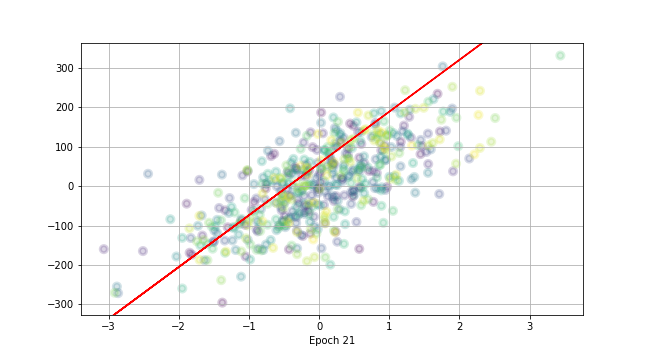

In [73]:
%matplotlib notebook
import numpy as np
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(9,5))
x_i = x
y_i = x_i * (-27) - 150
plt.scatter(x,y,c=co,cmap='viridis',s=50,alpha=0.2,linewidths=3)
plt.grid()
line, = ax.plot(x,y_i,c='red')

def update(i):
    label = f"Epoch {i+1}"
    line.set_ydata(x_i*all_m[i] + all_b[i])
    ax.set_xlabel(label)

# def init():
#     ax.set_xlim(0, 2*np.pi)
#     ax.set_ylim(-1, 1)
#     return ln,

# def update(frame):
#     xdata.append(frame)
#     ydata.append(np.sin(frame))
#     ln.set_data(xdata, ydata)
#     return ln,

ani = FuncAnimation(fig, update, frames=epochs,interval=50)